<div style=" background-color: rgb(43, 197, 37);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analyse des données de vente en ligne pour Lapage
</h2>
</div>

<div style="background-color: rgb(43, 197, 37);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement du fichier final</h2>
</div>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys
import matplotlib.ticker as ticker

print("numpy version:", np.__version__)
print("seaborn version:", sns.__version__)
print("Python version:", sys.version)
print("Python version:", datetime.__type_params__)

df_all = pd.read_csv('../Source/Data_processed/lapage_all.csv', sep=';', index_col=['Timestamp'] , parse_dates=True)

numpy version: 1.26.4
seaborn version: 0.13.2
Python version: 3.12.3 (v3.12.3:f6650f9ad7, Apr  9 2024, 08:18:47) [Clang 13.0.0 (clang-1300.0.29.30)]
Python version: ()


In [53]:
df_all.info()
df_all

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687534 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   session_id  687534 non-null  object 
 2   client_id   687534 non-null  object 
 3   sex         687534 non-null  object 
 4   birth       687534 non-null  int64  
 5   price       687534 non-null  float64
 6   categ       687534 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 42.0+ MB


,id_prod,session_id,client_id,sex,birth,price,categ
Timestamp,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0
...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1


<div style="background-color: rgb(43, 197, 37);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Partie 1 - Analyse des indicateurs de vente </h2>
</div>

In [54]:
total_revenue = df_all['price'].sum()
print('Chiffre d\'affaires total : {:,.2f}'.format(total_revenue))

average_monthly_revenue = df_all['price'].resample('ME').sum()
print('Chiffre d\'affaires moyen par Mois : {:,.2f}'.format(average_monthly_revenue.mean()))

Chiffre d'affaires total : 12,027,663.10
Chiffre d'affaires moyen par Mois : 501,152.63


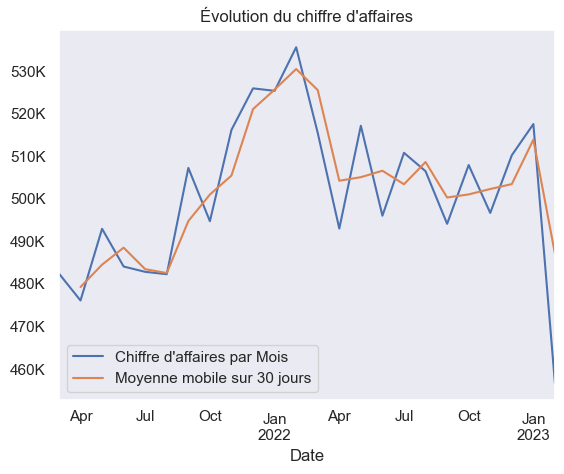

In [55]:
sns.set_theme(style="dark")

df_all['price'].resample('ME').sum().plot(label='Chiffre d\'affaires par Mois')
df_all['price'].resample('ME').sum().rolling(window=2).mean().plot(label='Moyenne mobile sur 30 jours')

plt.title('Évolution du chiffre d\'affaires')
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x * 1e-3)))

plt.legend()
plt.show()

In [56]:
annee_1 = df_all.loc[(df_all.index >= '2021-03-01') & (df_all.index <= '2022-02-28')]
annee_2 = df_all.loc[(df_all.index >= '2022-03-01') & (df_all.index <= '2023-02-28')]

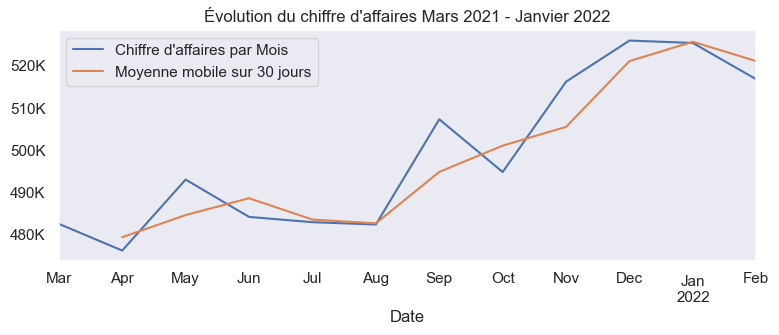

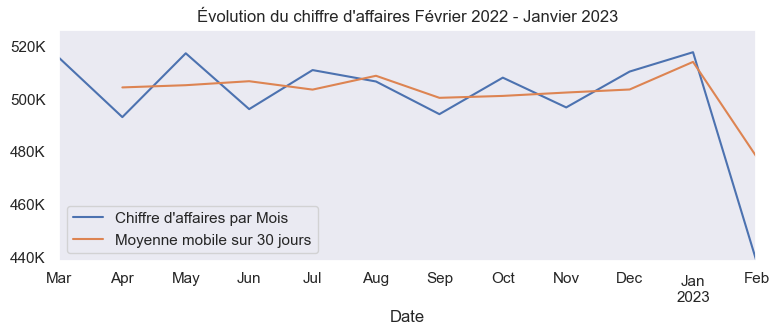

In [57]:
sns.set_theme(style="dark")

plt.figure(figsize=(9, 3))
annee_1['price'].resample('ME').sum().plot(label='Chiffre d\'affaires par Mois')
annee_1['price'].resample('ME').sum().rolling(window=2).mean().plot(label='Moyenne mobile sur 30 jours')
plt.title('Évolution du chiffre d\'affaires Mars 2021 - Janvier 2022')
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x * 1e-3)))
plt.legend()

plt.figure(figsize=(9, 3))
annee_2['price'].resample('ME').sum().plot(label='Chiffre d\'affaires par Mois')
annee_2['price'].resample('ME').sum().rolling(window=2).mean().plot(label='Moyenne mobile sur 30 jours')
plt.title('Évolution du chiffre d\'affaires Février 2022 - Janvier 2023')
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x * 1e-3)))

y_min = min(annee_1['price'].resample('ME').sum().min(), annee_2['price'].resample('ME').sum().min())
y_max = max(annee_1['price'].resample('ME').sum().max(), annee_2['price'].resample('ME').sum().max())

plt.gca().set_ylim(y_min, y_max)

plt.legend()
plt.show()